In [41]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [43]:
df.head()

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


1. Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год.

In [44]:
year_means = df.groupby(pd.Grouper(key='Day', freq='1YS')).mean()['t']
year_means.idxmin().year

2012

2. Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [45]:
condition = (df['Day'].dt.month == 6) & (df.t >= 0)
filtered_df = df[condition].apply(lambda row: [row.Day, 1], axis='columns', result_type='broadcast')
the_year = filtered_df.groupby(pd.Grouper(key='Day', freq='1MS')).sum()['t']
the_year.idxmax().year

2008

3. В каком году было самое холодное лето (по средней температуре)

In [49]:
condition = (df['Day'].dt.month == 6) | (df['Day'].dt.month == 7) | (df['Day'].dt.month == 8)
filtered_df = df[condition]
the_summer = filtered_df.groupby(pd.Grouper(key='Day', freq="3MS")).mean()['t']
the_summer.idxmin().year

2008

4. Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем.

In [47]:
diff = df['t'].diff().abs()
df.iloc[diff.idxmax()].Day

Timestamp('2014-05-27 00:00:00')

5. Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

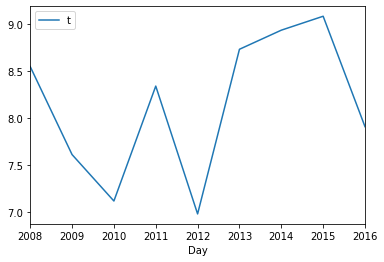

In [48]:
df.groupby(pd.Grouper(key="Day", freq="1YS")).mean().plot()